In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## Exploaring data (Cleaning)

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print("catagories in gender variable: ", end=" ")
print(df['gender'].unique())

print("catagories in 'race/ethenticity' variable ", end=" ")
print(df['race_ethnicity'].unique())

print("catagories in 'Parental Level Of Education' variable ", end=" ")
print(df['parental_level_of_education'].unique())

print("catagories in 'Lunch' variable ", end=" ")
print(df['lunch'].unique())

print("catagories in 'test prepration course' variable ", end=" ")
print(df['test_preparation_course'].unique())


catagories in gender variable:  ['female' 'male']
catagories in 'race/ethenticity' variable  ['group B' 'group C' 'group A' 'group D' 'group E']
catagories in 'Parental Level Of Education' variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in 'Lunch' variable  ['standard' 'free/reduced']
catagories in 'test prepration course' variable  ['none' 'completed']


In [15]:
#defining numerical & catagorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
# print columns
print('we have{} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have{} categorical features: {}'.format(len(categorical_features),categorical_features))


we have3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [16]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full= df[df['reading_score']==100]['average_score'].count()
writing_full= df[df['writing_score']==100]['average_score'].count()
math_full= df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in Writing: 14


In [19]:
reading_less_20=df[df['reading_score']<= 20]['average_score'].count()
writing_less_20=df[df['writing_score']<= 20]['average_score'].count()
math_less_20=df[df['math_score']<= 20]['average_score'].count()

print(f'Number of students with marks less then 20 marks in reading:{reading_less_20}')
print(f'Number of students with marks less then 20 marks in writing:{writing_less_20}')
print(f'Number of students with marks less then 20 marks in Maths:{math_less_20}')

Number of students with marks less then 20 marks in reading:1
Number of students with marks less then 20 marks in writing:3
Number of students with marks less then 20 marks in Maths:4


#### Observation
* There are less number of student get the highest marks in Maths while more are the highest marks with reading
* There are High number of students get the lowest marks in Maths while very low arround only 1 student get the low marks in reading

## Exploaring Data (Visualisatio)

#### Visualising Average Score Distribution to make some conclusion

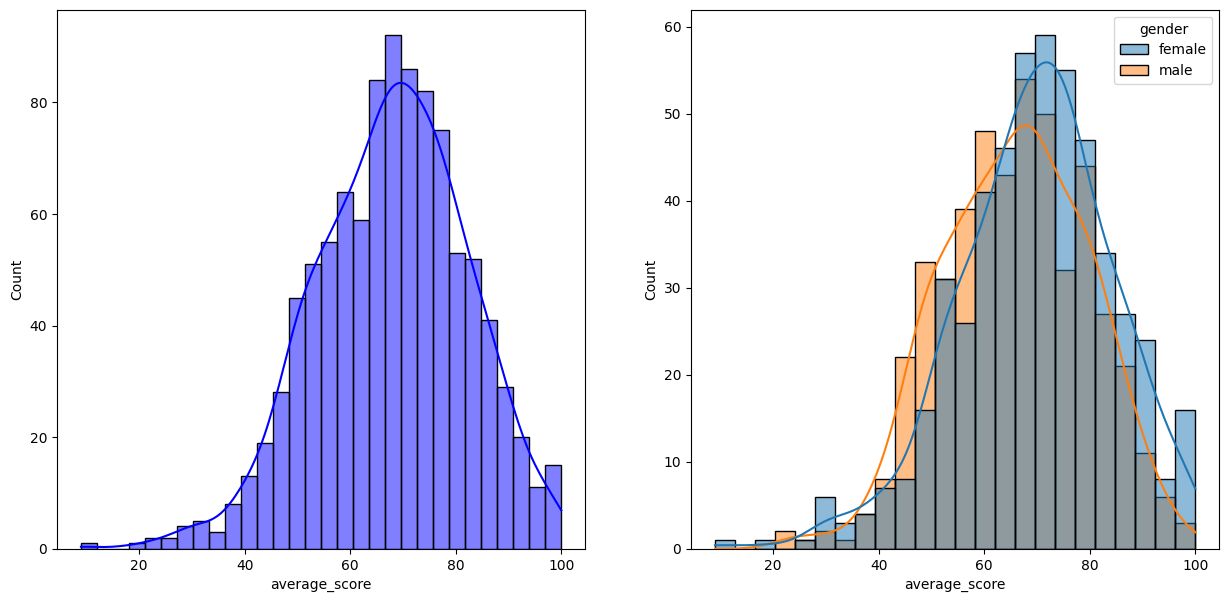

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True, color='b')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

* Female students tend to perform well then male students

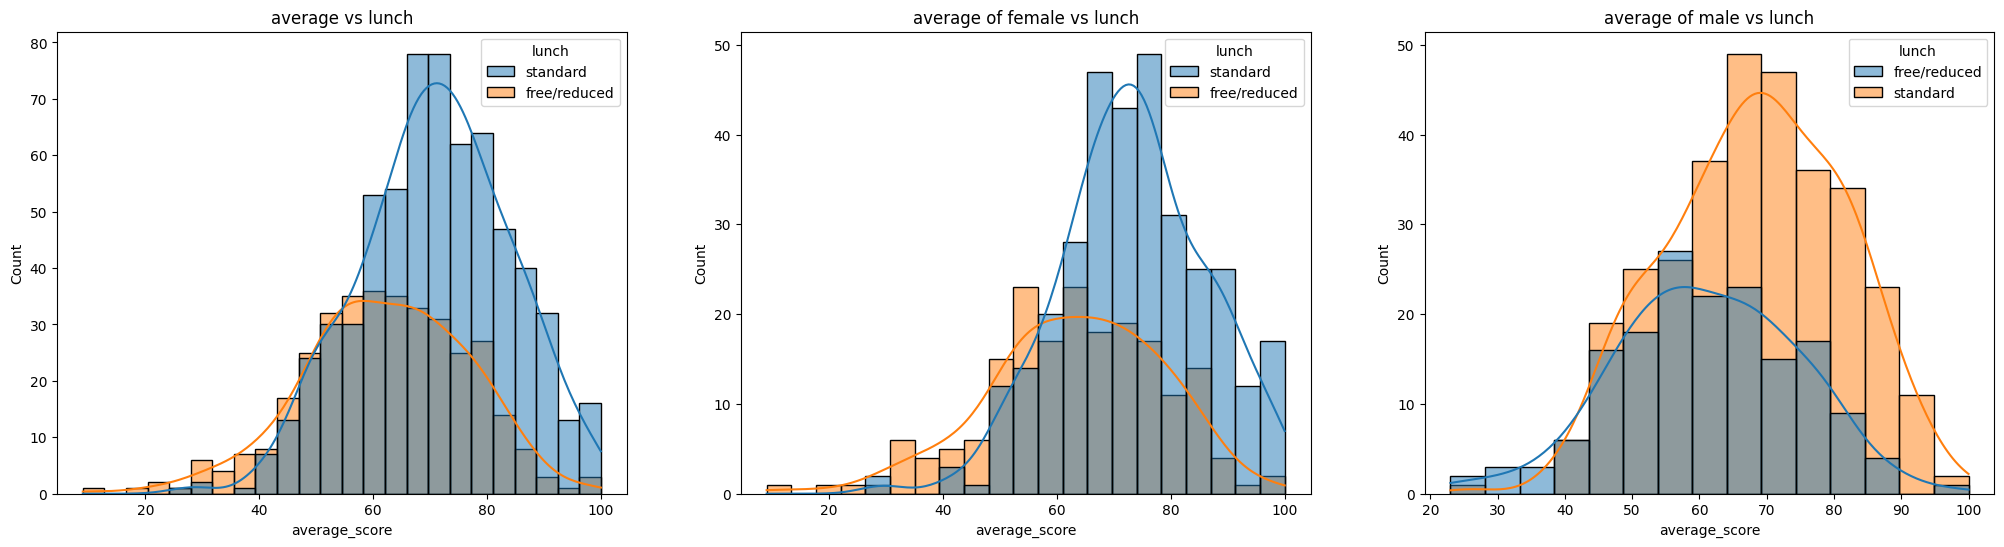

In [25]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score', kde=True,hue='lunch')
plt.title('average vs lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.title('average of female vs lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.title('average of male vs lunch')
plt.show()

* The data shows that students with standard lunch have performed well then students with free/reduced lunch

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


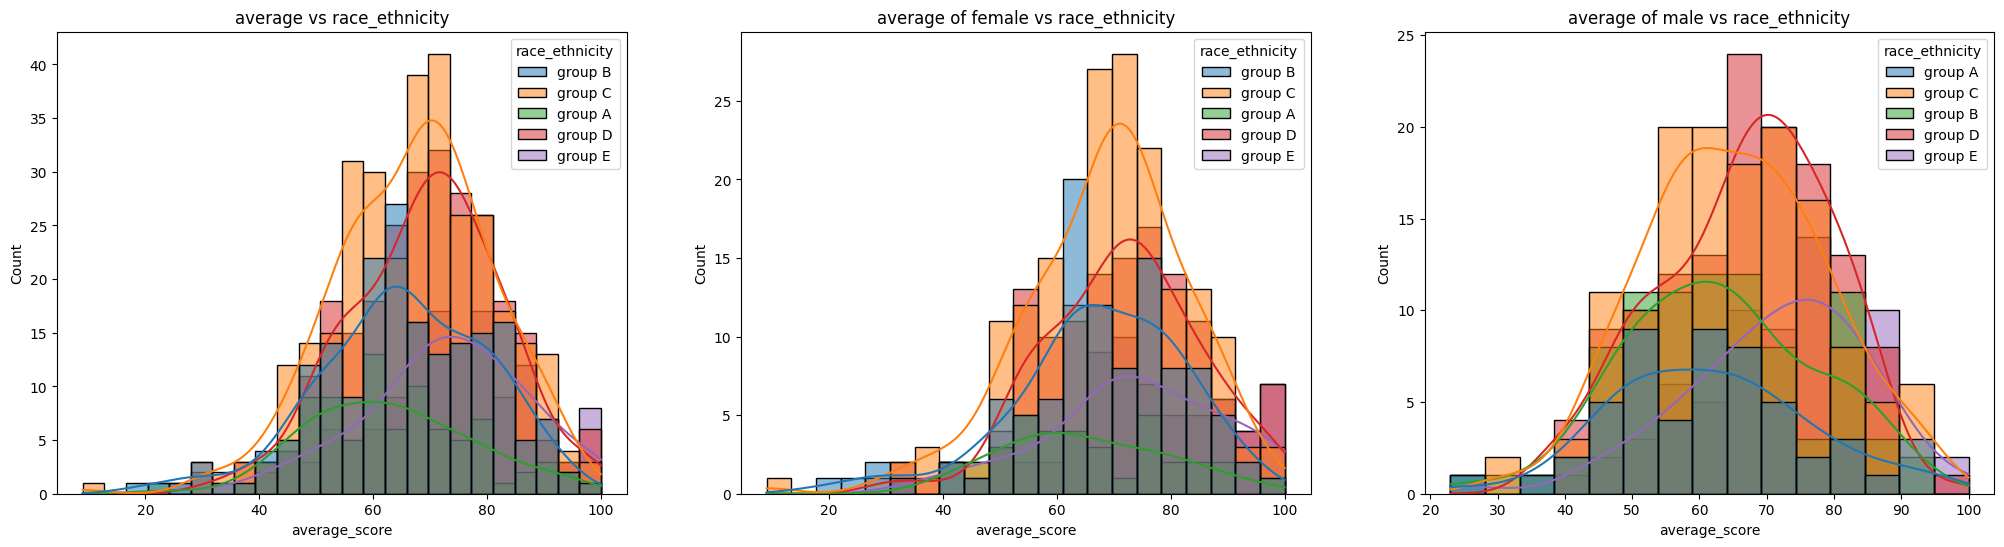

In [28]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score', kde=True,hue='race_ethnicity')
plt.title('average vs race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('average of female vs race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('average of male vs race_ethnicity')
plt.show()

* Group A Have low average in comparision to other group
* In Females group B have performed well while Males of same group have very low score
* Overall performence of Group C is higher Females of group C performed very well and Males have also performed well
* Group D in female catagory shown slightly down in this group while Males have performed very well
* Grouo E comes under everage performance for both male and female 

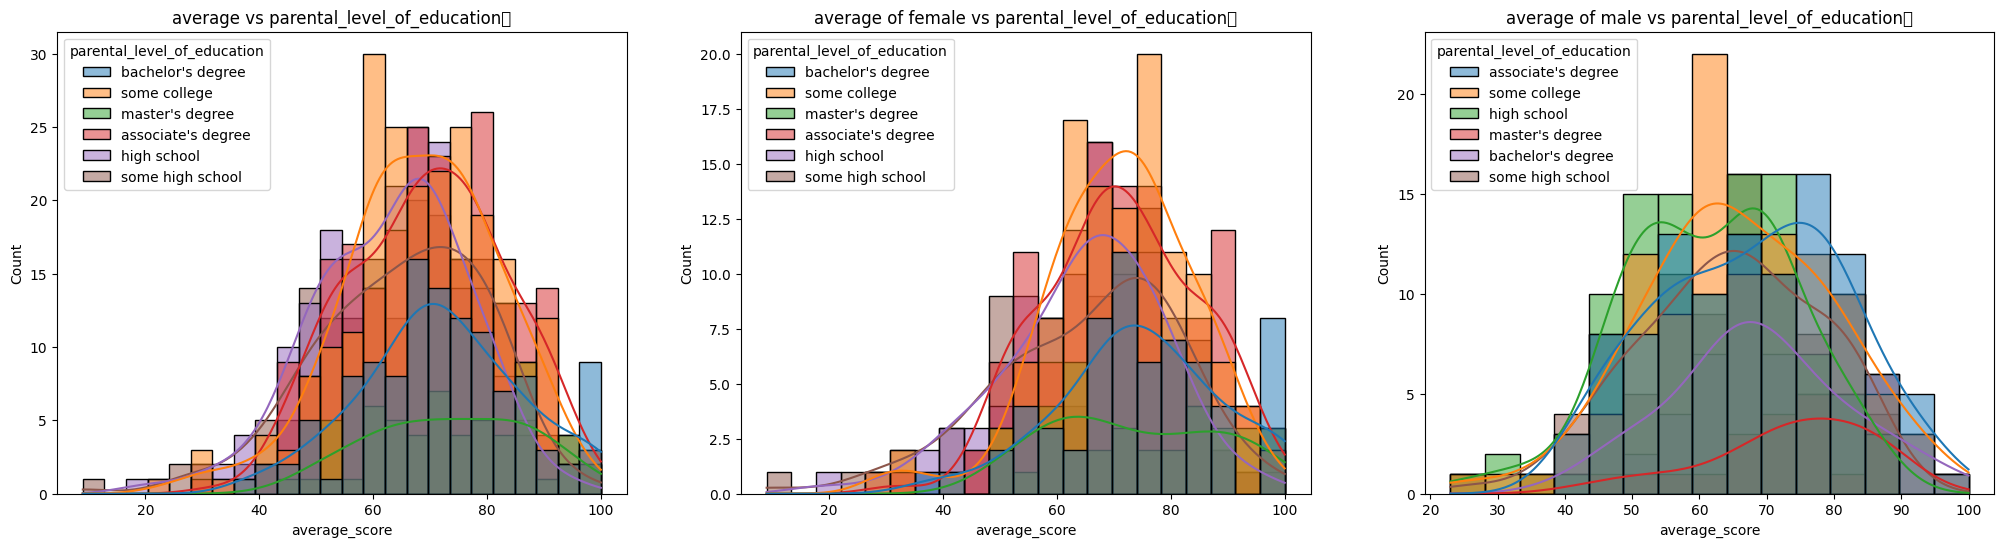

In [30]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score', kde=True,hue='parental_level_of_education')
plt.title('average vs parental_level_of_education	')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('average of female vs parental_level_of_education	')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('average of male vs parental_level_of_education	')
plt.show()

* Students whose parents education level is Master's or Bachlore's degree have performed poor in female and well performed in male 
* Students whose parents have some High school educations are also comparitivly low score then others 

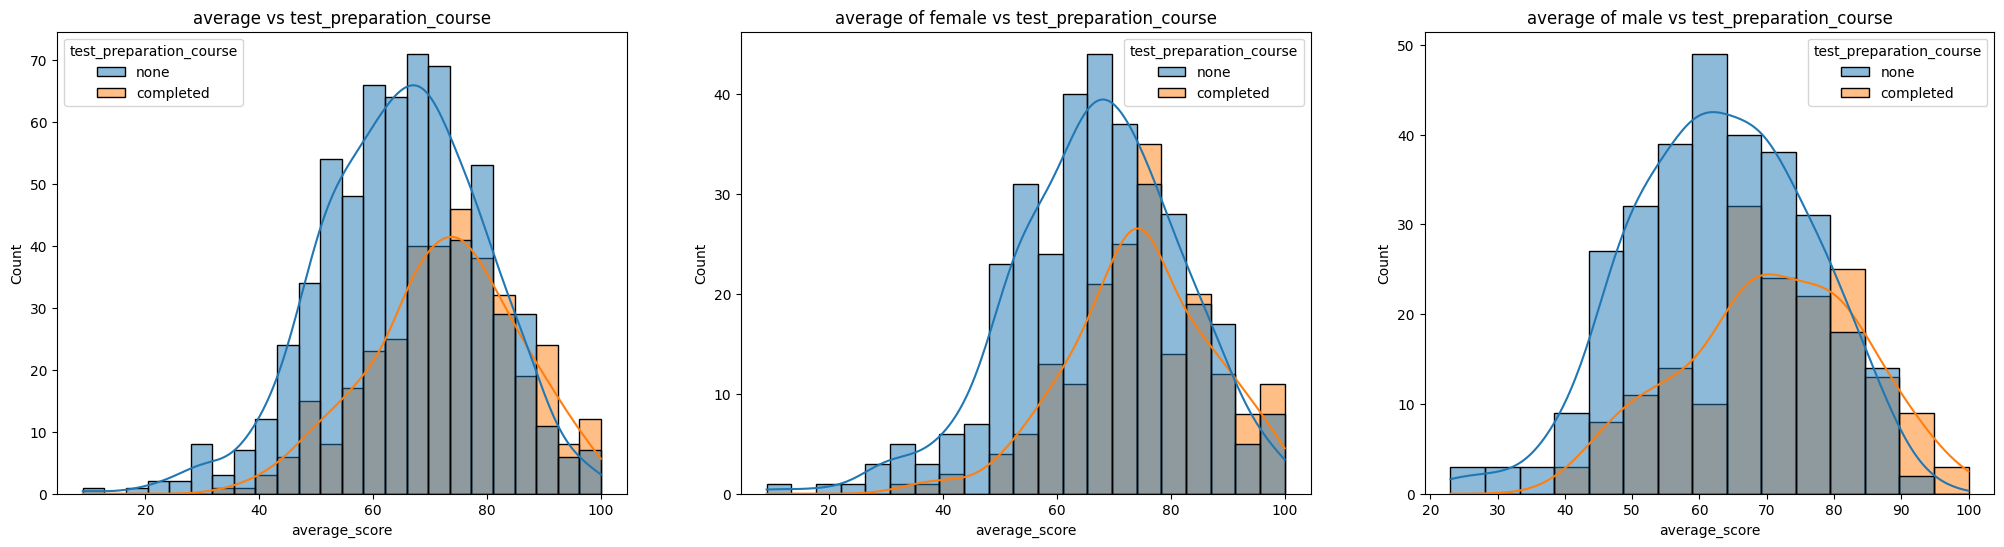

In [31]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score', kde=True,hue='test_preparation_course')
plt.title('average vs test_preparation_course')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='test_preparation_course')
plt.title('average of female vs test_preparation_course')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='test_preparation_course')
plt.title('average of male vs test_preparation_course')
plt.show()

* Data shows that Students with no Test prepration Course Performed Well in compared to the Students who have completed This course

#### Maximum score of students in all three subjects

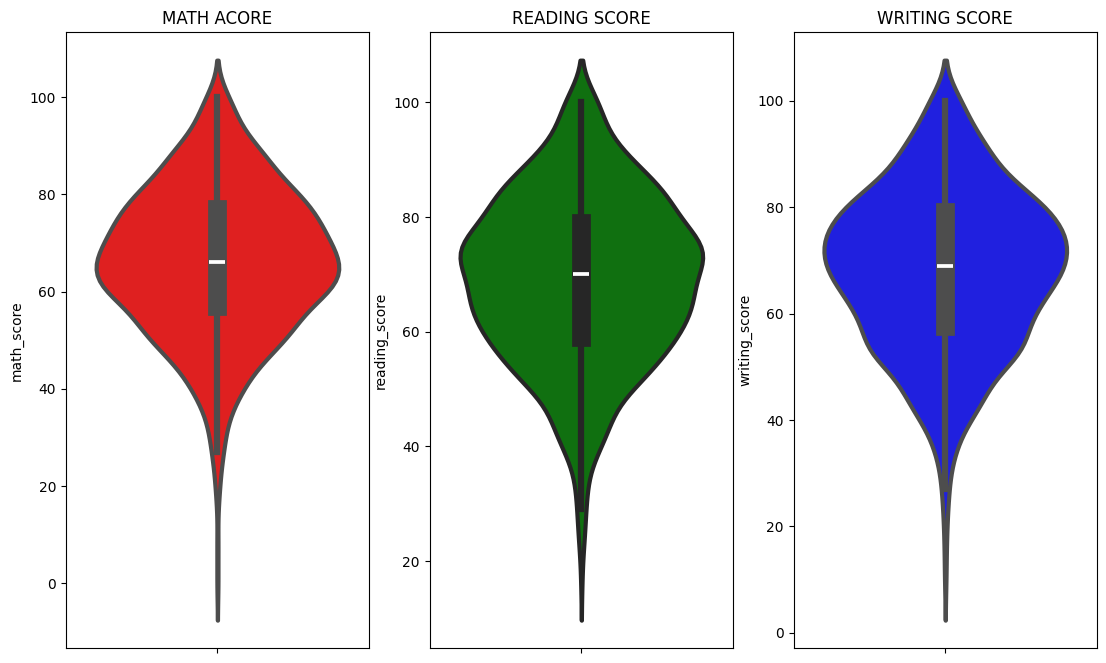

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH ACORE')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Insights

* From above graph it is shown that most of the students scored between 60 to 80 in Maths whereas for reading and writing they scored between 50 to 80

#### Multivariate Analysis Using Pieplot

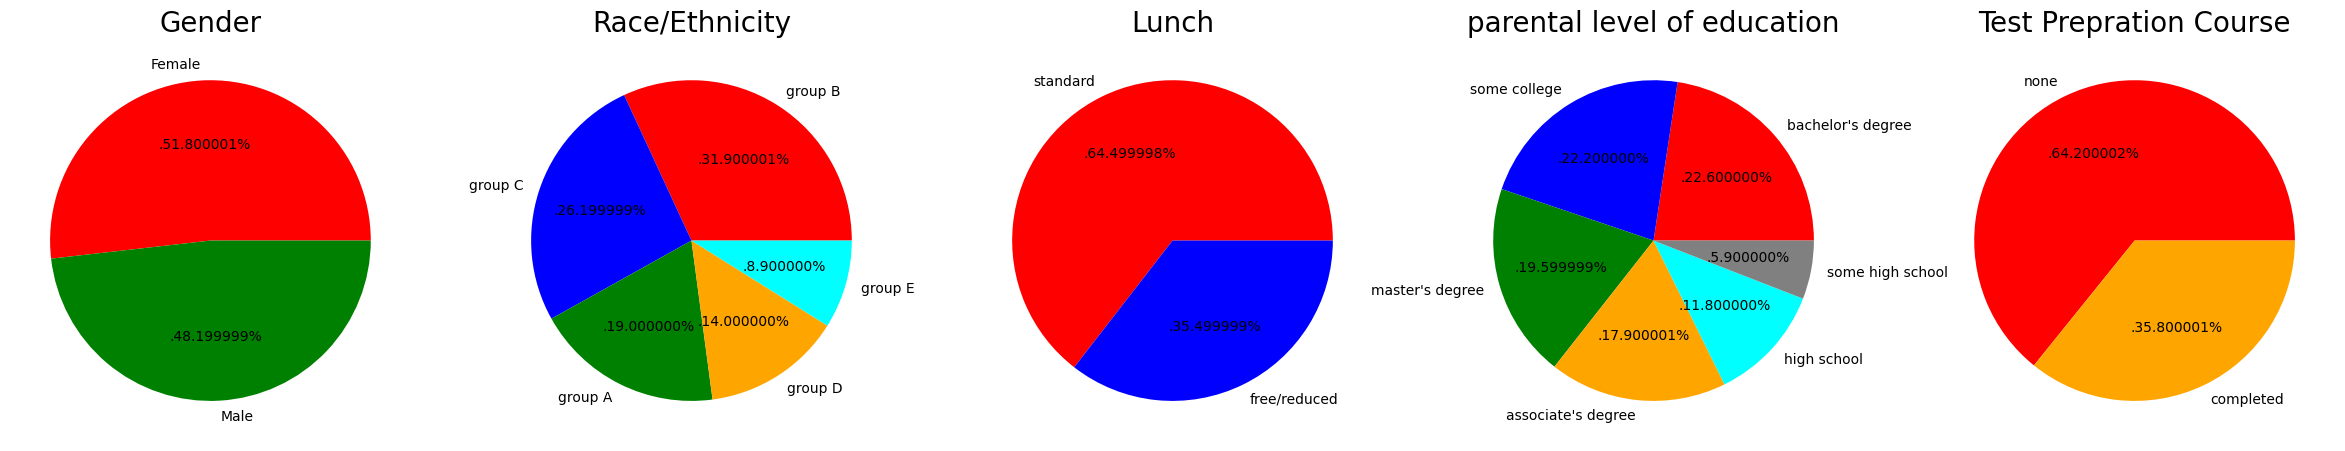

In [34]:
plt.figure(figsize=(30,12))
plt.subplot(1,5,1)

size= df['gender'].value_counts()
labels='Female', 'Male'
color=['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size= df['race_ethnicity'].value_counts()
labels='group B', 'group C', 'group A', 'group D', 'group E'
color=['red','blue','green','orange','cyan']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels= 'standard', 'free/reduced'
color=['red','blue']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['parental_level_of_education'].value_counts()
labels= "bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school'
color=['red','blue','green','orange','cyan','grey']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('parental level of education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size= df['test_preparation_course'].value_counts()
labels='none','completed'
color=['red','orange']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Test Prepration Course', fontsize=20)
plt.axis('off')

plt.tight_layout
plt.grid()
plt.show()

#### Insights
* Females students are slightly more 51.8% then Male studens 48.1%
* Race of Group B students are higher 32% whereas Race of Group E students are less only 9%
* 64% of students take standard lunch and other 35.5% take free/reduced lunch
* almost 42% of students parents are studied from some college or have bechelor's degree whereas very less number of students parents almost 6% have studied at some high school
* only 36% of students have completed the test course where as other students did not.

#### Feature Wise Visualization
#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

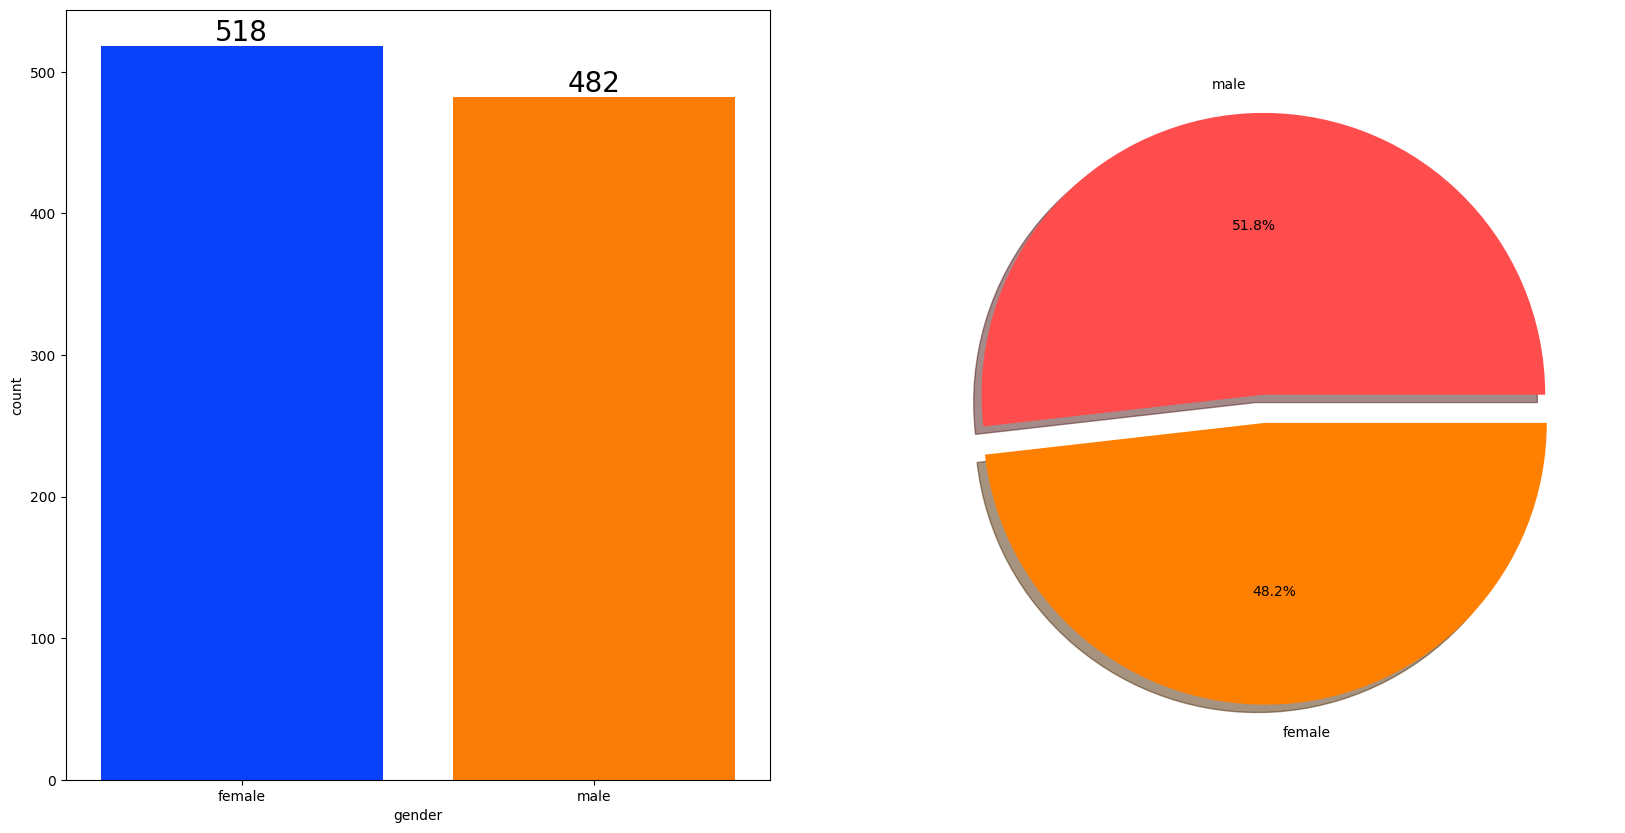

In [36]:
f,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Bivariate Analysis (gender impact on students performance)

In [42]:
gender_group= df.groupby('gender')[['average_score','math_score']].mean()
gender_group

,average_score,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


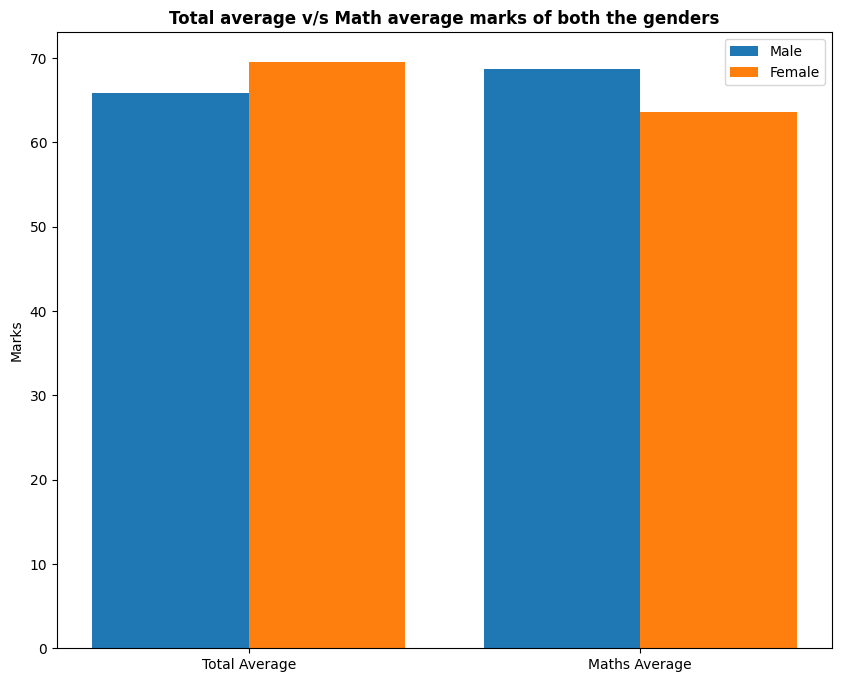

In [43]:
plt.figure(figsize=(10,8))

X=['Total Average','Maths Average']

female_scores=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average_score'][1],gender_group['math_score'][1]]
X_axis=np.arange(len(X))

plt.bar(X_axis-0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis+0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights

* On an average femails have a better overall score than men.
* Whereas males hae scored higher n Maths

#### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

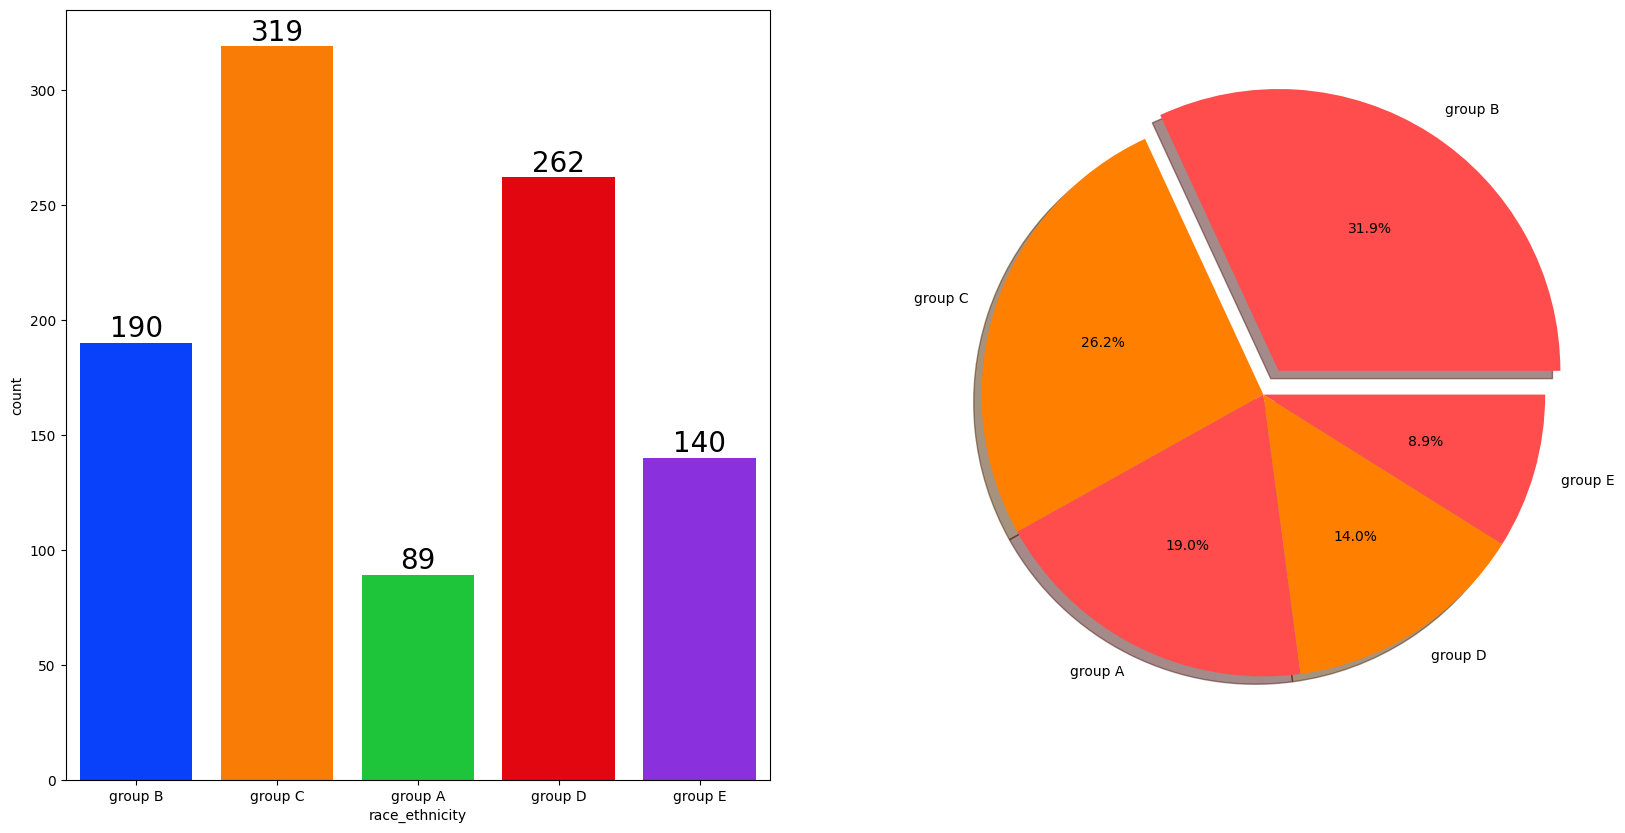

In [45]:
f,ax =plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=['group B', 'group C', 'group A', 'group D', 'group E'],explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
* Many of the students are from group B and C
* While Very lass students are from group A

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [53]:
race_group= df.groupby('race_ethnicity')[['math_score','reading_score','writing_score']].mean()
race_group

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


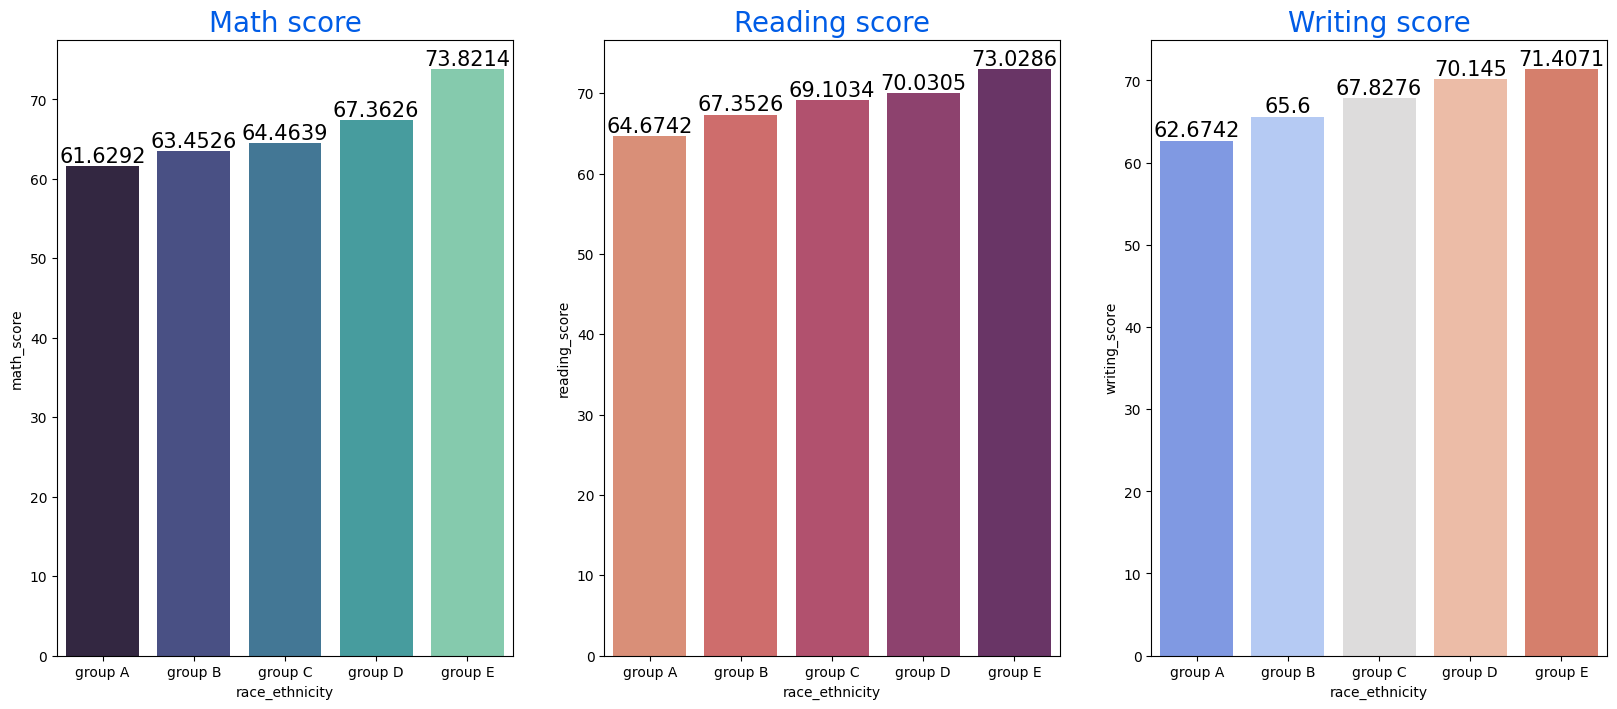

In [54]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_group.index,y=race_group['math_score'],palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_group.index,y=race_group['reading_score'],palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_group.index,y=race_group['writing_score'],palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
* overall performance of group A was poor
* While Group E Overall Performance is Excelled in comparision to all the other group 

#### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


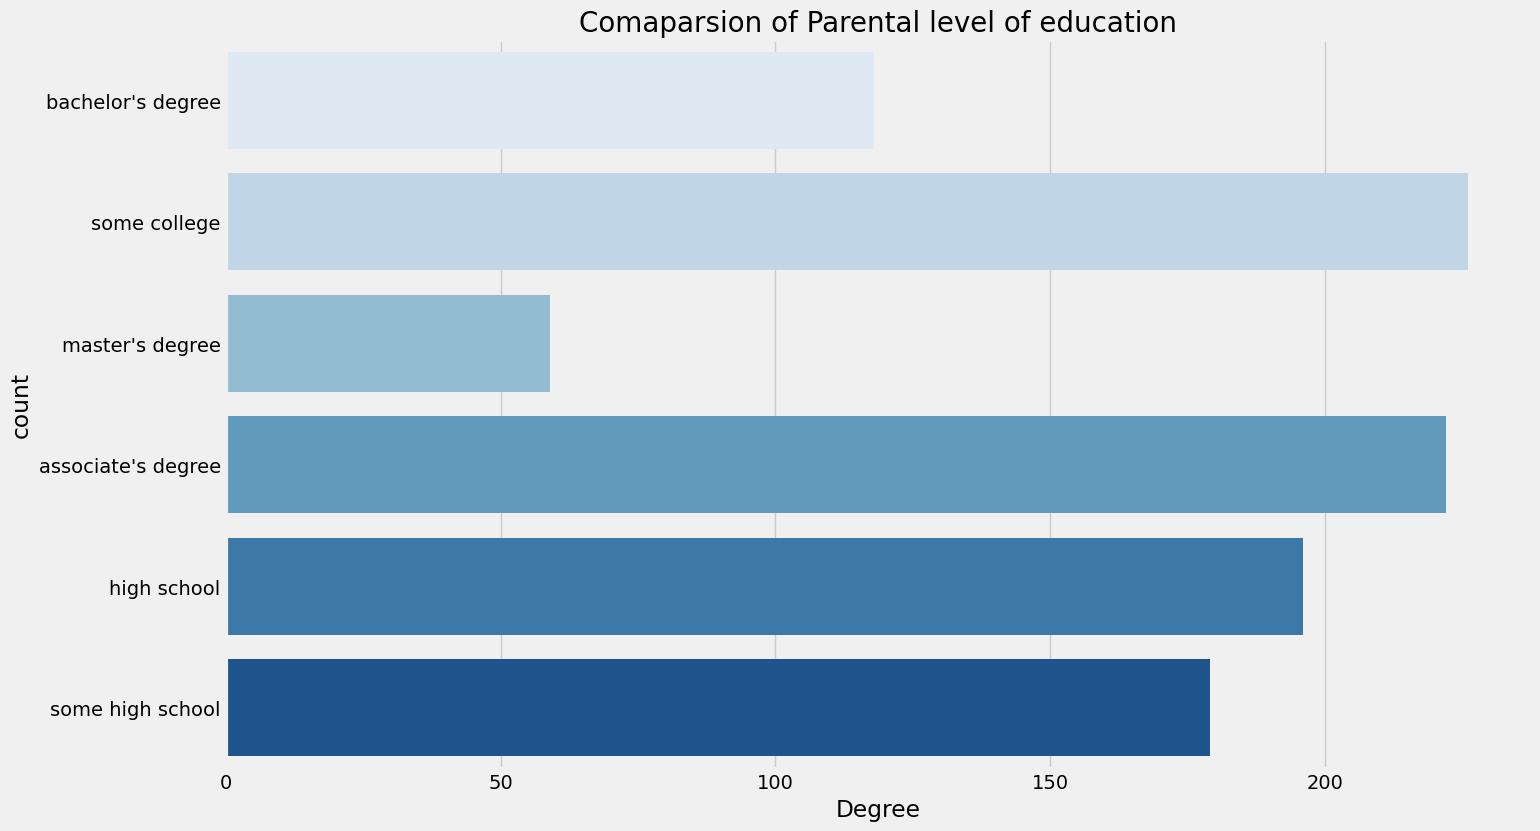

In [56]:
plt.figure(figsize=(15,9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comaparsion of Parental level of education', fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
* Largest number of parents are from some college and associate's degree
* very less number of parents have masters degree

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

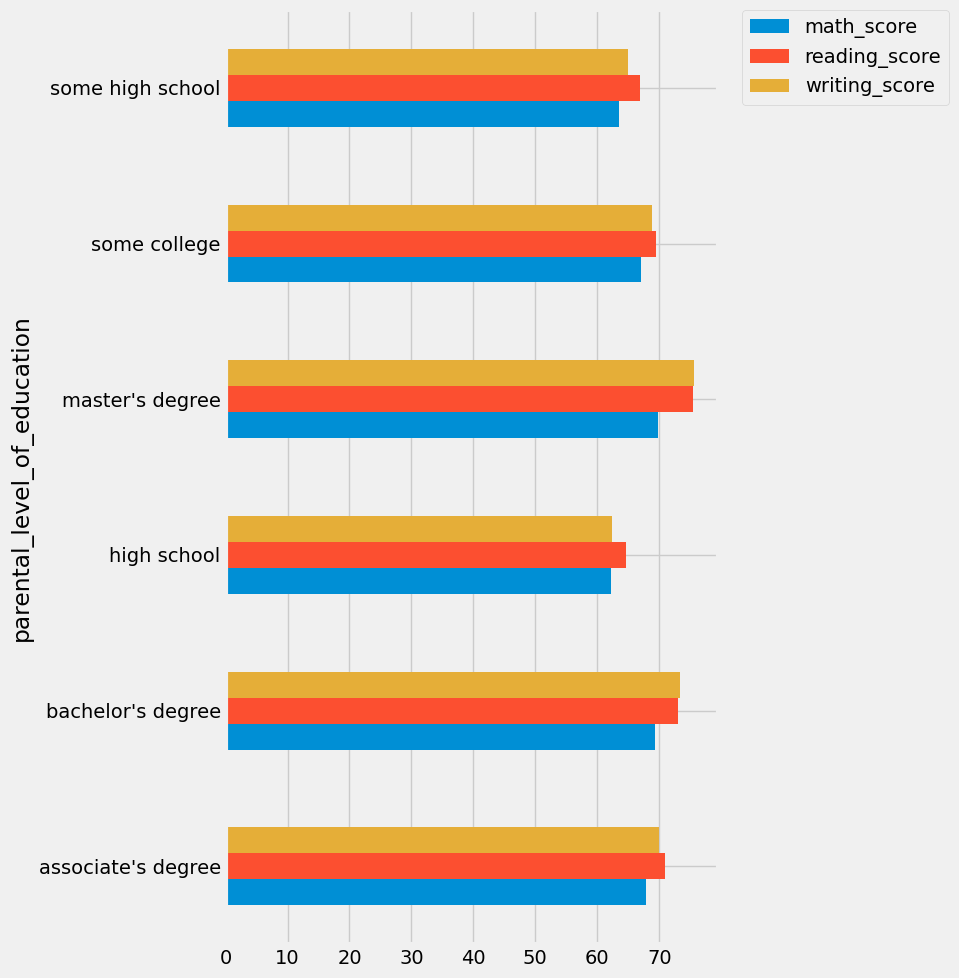

In [61]:
ax = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().plot(
    kind='barh', figsize=(10, 10)
)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


#### Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing_score'>

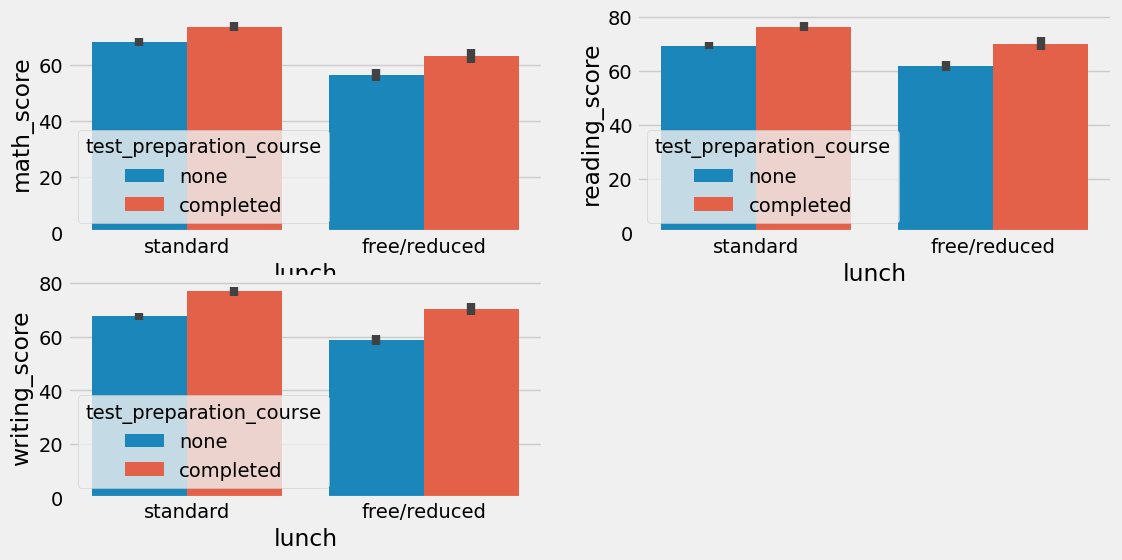

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


### Checking OUTLIERS

<Axes: ylabel='average_score'>

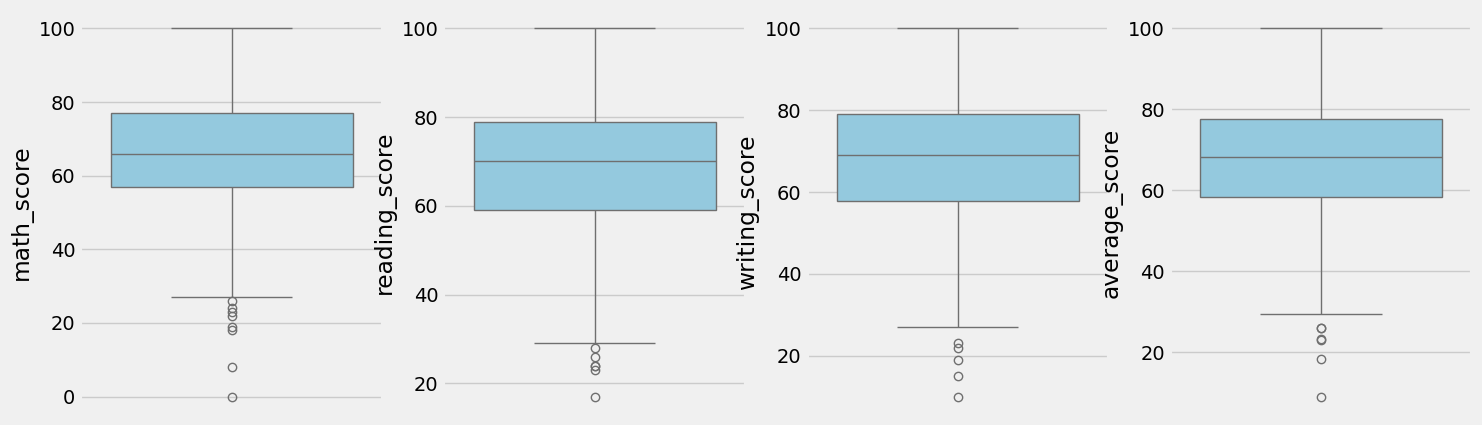

In [64]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'], color='skyblue')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'], color='skyblue')
plt.subplot(1,4,4)
sns.boxplot(df['average_score'], color='skyblue')

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

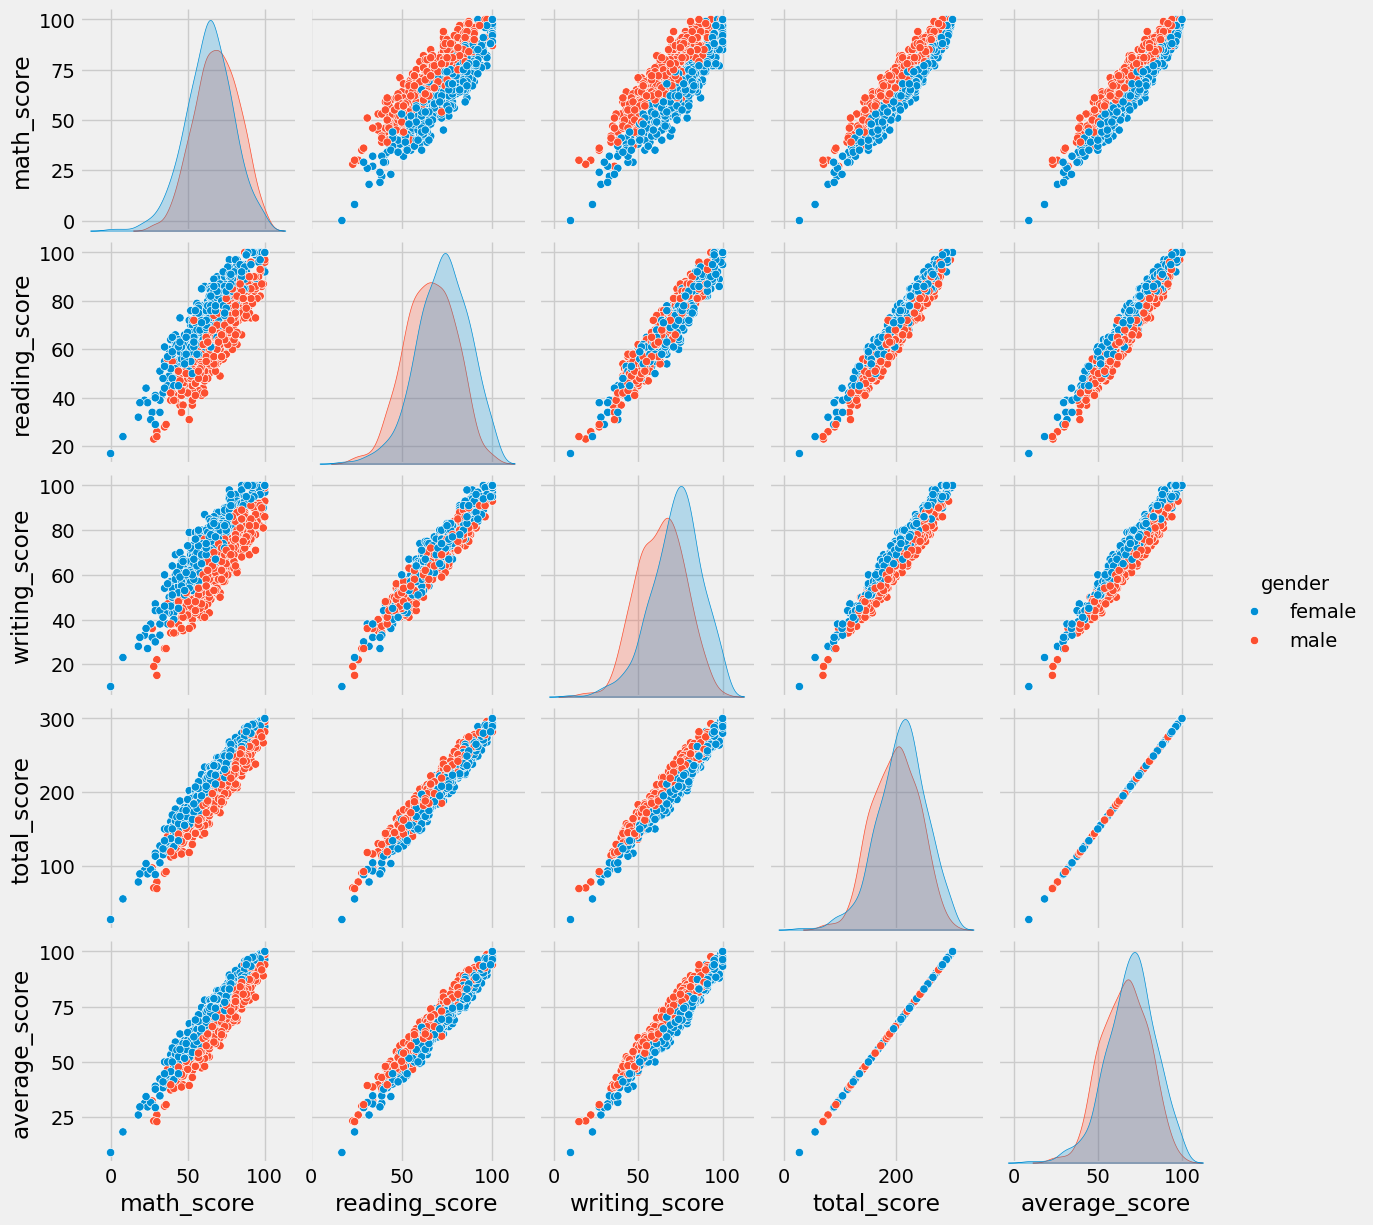

In [65]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.